In [ ]:
# 价量

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torchvision import datasets
from torchvision import transforms
import tensorflow as tf
from tensorflow import keras
import sympy
from sympy import Matrix
import tushare as ts

%config InlineBackend.figure_format = "svg"  #in order to make the figures shown clearly in the notebook

# Data Generating

In [7]:
data = ts.get_k_data('hs300',start = '2014-09-19', end = '2017-09-19')
data.set_index("date", inplace = True)
data

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,close,high,low,volume,code
date,,,,,,
2014-09-19,2409.31,2425.21,2430.15,2402.31,101813577.0,hs300
2014-09-22,2419.33,2378.92,2419.33,2374.11,102240870.0,hs300
2014-09-23,2379.52,2399.46,2402.48,2379.52,84033341.0,hs300
2014-09-24,2391.42,2441.86,2443.98,2387.07,142713530.0,hs300
2014-09-25,2453.42,2436.97,2462.67,2429.59,138661891.0,hs300
2014-09-26,2430.81,2437.20,2439.65,2420.50,100299494.0,hs300
2014-09-29,2443.91,2447.80,2453.67,2435.61,123401727.0,hs300
2014-09-30,2452.17,2450.99,2454.89,2444.20,115804229.0,hs300
2014-10-08,2460.87,2478.38,2478.38,2445.27,121953604.0,hs300


In [8]:
data_cleaned = pd.DataFrame()
data_cleaned["Close0"] = np.log(data["close"])
data_cleaned["H_L"] = data["high"] - data["low"]
data_cleaned["C_O"] = data["close"] - data["open"]
data_cleaned["Volume"] = np.log10(data["volume"])

data_cleaned["Close1"] = data_cleaned["Close0"].shift(1)
data_cleaned["Close2"] = data_cleaned["Close0"].shift(2)
data_cleaned["Close3"] = data_cleaned["Close0"].shift(3)
data_cleaned["Close4"] = data_cleaned["Close0"].shift(4)
data_cleaned["Close5"] = data_cleaned["Close0"].shift(5)

data_cleaned["H_L1"] = data_cleaned["H_L"].shift(1)
data_cleaned["H_L2"] = data_cleaned["H_L"].shift(2)
data_cleaned["H_L3"] = data_cleaned["H_L"].shift(3)
data_cleaned["H_L4"] = data_cleaned["H_L"].shift(4)
data_cleaned["H_L5"] = data_cleaned["H_L"].shift(5)

data_cleaned["C_O1"] = data_cleaned["C_O"].shift(1)
data_cleaned["C_O2"] = data_cleaned["C_O"].shift(2)
data_cleaned["C_O3"] = data_cleaned["C_O"].shift(3)
data_cleaned["C_O4"] = data_cleaned["C_O"].shift(4)
data_cleaned["C_O5"] = data_cleaned["C_O"].shift(5)

data_cleaned["Volume1"] = data_cleaned["Volume"].shift(1)
data_cleaned["Volume2"] = data_cleaned["Volume"].shift(2)
data_cleaned["Volume3"] = data_cleaned["Volume"].shift(3)
data_cleaned["Volume4"] = data_cleaned["Volume"].shift(4)
data_cleaned["Volume5"] = data_cleaned["Volume"].shift(5)


data_cleaned["Close0_shift(-1)"] = data_cleaned["Close0"].shift(-1)
data_cleaned["label"] = 0.5 + 0.5 * np.sign(data_cleaned["Close0_shift(-1)"] - data_cleaned["Close0"])


In [11]:
data_cleaned.head(25)

,Close0,H_L,C_O,Volume,Close1,Close2,Close3,Close4,Close5,H_L1,...,C_O3,C_O4,C_O5,Volume1,Volume2,Volume3,Volume4,Volume5,Close0_shift(-1),label
date,,,,,,,,,,,,,,,,,,,,,
2014-09-19,7.793673,27.84,15.90,8.007806,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.774402,0.0
2014-09-22,7.774402,45.22,-40.41,8.009625,7.793673,NaN,NaN,NaN,NaN,27.84,...,NaN,NaN,NaN,8.007806,NaN,NaN,NaN,NaN,7.782999,1.0
2014-09-23,7.782999,22.96,19.94,7.924452,7.774402,7.793673,NaN,NaN,NaN,45.22,...,NaN,NaN,NaN,8.009625,8.007806,NaN,NaN,NaN,7.800515,1.0
2014-09-24,7.800515,56.91,50.44,8.154465,7.782999,7.774402,7.793673,NaN,NaN,22.96,...,15.90,NaN,NaN,7.924452,8.009625,8.007806,NaN,NaN,7.798511,0.0
2014-09-25,7.798511,33.08,-16.45,8.141957,7.800515,7.782999,7.774402,7.793673,NaN,56.91,...,-40.41,15.90,NaN,8.154465,7.924452,8.009625,8.007806,NaN,7.798605,1.0
2014-09-26,7.798605,19.15,6.39,8.001299,7.798511,7.800515,7.782999,7.774402,7.793673,33.08,...,19.94,-40.41,15.90,8.141957,8.154465,7.924452,8.009625,8.007806,7.802945,1.0
2014-09-29,7.802945,18.06,3.89,8.091321,7.798605,7.798511,7.800515,7.782999,7.774402,19.15,...,50.44,19.94,-40.41,8.001299,8.141957,8.154465,7.924452,8.009625,7.804247,1.0
2014-09-30,7.804247,10.69,-1.18,8.063724,7.802945,7.798605,7.798511,7.800515,7.782999,18.06,...,-16.45,50.44,19.94,8.091321,8.001299,8.141957,8.154465,7.924452,7.815360,1.0
2014-10-08,7.815360,33.11,17.51,8.086195,7.804247,7.802945,7.798605,7.798511,7.800515,10.69,...,6.39,-16.45,50.44,8.063724,8.091321,8.001299,8.141957,8.154465,7.816804,1.0


feature r 1*24   

In [12]:
data_cleaned.dropna(inplace = True)
data_cleaned.drop(["Close0_shift(-1)"], axis = 1, inplace = True)

In [13]:
data_cleaned

,Close0,H_L,C_O,Volume,Close1,Close2,Close3,Close4,Close5,H_L1,...,C_O2,C_O3,C_O4,C_O5,Volume1,Volume2,Volume3,Volume4,Volume5,label
date,,,,,,,,,,,,,,,,,,,,,
2014-09-26,7.798605,19.15,6.39,8.001299,7.798511,7.800515,7.782999,7.774402,7.793673,33.08,...,50.44,19.94,-40.41,15.90,8.141957,8.154465,7.924452,8.009625,8.007806,1.0
2014-09-29,7.802945,18.06,3.89,8.091321,7.798605,7.798511,7.800515,7.782999,7.774402,19.15,...,-16.45,50.44,19.94,-40.41,8.001299,8.141957,8.154465,7.924452,8.009625,1.0
2014-09-30,7.804247,10.69,-1.18,8.063724,7.802945,7.798605,7.798511,7.800515,7.782999,18.06,...,6.39,-16.45,50.44,19.94,8.091321,8.001299,8.141957,8.154465,7.924452,1.0
2014-10-08,7.815360,33.11,17.51,8.086195,7.804247,7.802945,7.798605,7.798511,7.800515,10.69,...,3.89,6.39,-16.45,50.44,8.063724,8.091321,8.001299,8.141957,8.154465,1.0
2014-10-09,7.816804,27.00,1.76,8.139640,7.815360,7.804247,7.802945,7.798605,7.798511,33.11,...,-1.18,3.89,6.39,-16.45,8.086195,8.063724,8.091321,8.001299,8.141957,0.0
2014-10-10,7.810673,24.46,-5.31,8.169187,7.816804,7.815360,7.804247,7.802945,7.798605,27.00,...,17.51,-1.18,3.89,6.39,8.139640,8.086195,8.063724,8.091321,8.001299,0.0
2014-10-13,7.805862,29.84,-2.46,8.119234,7.810673,7.816804,7.815360,7.804247,7.802945,24.46,...,1.76,17.51,-1.18,3.89,8.169187,8.139640,8.086195,8.063724,8.091321,0.0
2014-10-14,7.802438,31.56,-4.53,8.105148,7.805862,7.810673,7.816804,7.815360,7.804247,29.84,...,-5.31,1.76,17.51,-1.18,8.119234,8.169187,8.139640,8.086195,8.063724,1.0
2014-10-15,7.809489,34.31,19.33,8.132906,7.802438,7.805862,7.810673,7.816804,7.815360,31.56,...,-2.46,-5.31,1.76,17.51,8.105148,8.119234,8.169187,8.139640,8.086195,0.0


In [14]:
training_set = data_cleaned.iloc[: 507, :]
test_set = data_cleaned.iloc[507 :, :]

In [15]:
training_set

,Close0,H_L,C_O,Volume,Close1,Close2,Close3,Close4,Close5,H_L1,...,C_O2,C_O3,C_O4,C_O5,Volume1,Volume2,Volume3,Volume4,Volume5,label
date,,,,,,,,,,,,,,,,,,,,,
2014-09-26,7.798605,19.15,6.39,8.001299,7.798511,7.800515,7.782999,7.774402,7.793673,33.08,...,50.44,19.94,-40.41,15.90,8.141957,8.154465,7.924452,8.009625,8.007806,1.0
2014-09-29,7.802945,18.06,3.89,8.091321,7.798605,7.798511,7.800515,7.782999,7.774402,19.15,...,-16.45,50.44,19.94,-40.41,8.001299,8.141957,8.154465,7.924452,8.009625,1.0
2014-09-30,7.804247,10.69,-1.18,8.063724,7.802945,7.798605,7.798511,7.800515,7.782999,18.06,...,6.39,-16.45,50.44,19.94,8.091321,8.001299,8.141957,8.154465,7.924452,1.0
2014-10-08,7.815360,33.11,17.51,8.086195,7.804247,7.802945,7.798605,7.798511,7.800515,10.69,...,3.89,6.39,-16.45,50.44,8.063724,8.091321,8.001299,8.141957,8.154465,1.0
2014-10-09,7.816804,27.00,1.76,8.139640,7.815360,7.804247,7.802945,7.798605,7.798511,33.11,...,-1.18,3.89,6.39,-16.45,8.086195,8.063724,8.091321,8.001299,8.141957,0.0
2014-10-10,7.810673,24.46,-5.31,8.169187,7.816804,7.815360,7.804247,7.802945,7.798605,27.00,...,17.51,-1.18,3.89,6.39,8.139640,8.086195,8.063724,8.091321,8.001299,0.0
2014-10-13,7.805862,29.84,-2.46,8.119234,7.810673,7.816804,7.815360,7.804247,7.802945,24.46,...,1.76,17.51,-1.18,3.89,8.169187,8.139640,8.086195,8.063724,8.091321,0.0
2014-10-14,7.802438,31.56,-4.53,8.105148,7.805862,7.810673,7.816804,7.815360,7.804247,29.84,...,-5.31,1.76,17.51,-1.18,8.119234,8.169187,8.139640,8.086195,8.063724,1.0
2014-10-15,7.809489,34.31,19.33,8.132906,7.802438,7.805862,7.810673,7.816804,7.815360,31.56,...,-2.46,-5.31,1.76,17.51,8.105148,8.119234,8.169187,8.139640,8.086195,0.0


In [16]:
test_set

,Close0,H_L,C_O,Volume,Close1,Close2,Close3,Close4,Close5,H_L1,...,C_O2,C_O3,C_O4,C_O5,Volume1,Volume2,Volume3,Volume4,Volume5,label
date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,8.112612,23.14,3.87,7.853411,8.113765,8.115431,8.118147,8.121911,8.121950,33.46,...,-5.76,-10.40,-0.03,35.07,7.969105,7.890029,7.991336,8.046072,8.184732,1.0
2016-11-01,8.119413,24.93,20.34,7.874703,8.112612,8.113765,8.115431,8.118147,8.121911,23.14,...,-7.01,-5.76,-10.40,-0.03,7.853411,7.969105,7.890029,7.991336,8.046072,0.0
2016-11-02,8.111733,25.02,-17.36,7.959981,8.119413,8.112612,8.113765,8.115431,8.118147,24.93,...,3.87,-7.01,-5.76,-10.40,7.874703,7.853411,7.969105,7.890029,7.991336,1.0
2016-11-03,8.121207,55.15,38.18,8.101140,8.111733,8.119413,8.112612,8.113765,8.115431,25.02,...,20.34,3.87,-7.01,-5.76,7.959981,7.874703,7.853411,7.969105,7.890029,0.0
2016-11-04,8.117960,29.21,-8.04,8.017324,8.121207,8.111733,8.119413,8.112612,8.113765,55.15,...,-17.36,20.34,3.87,-7.01,8.101140,7.959981,7.874703,7.853411,7.969105,1.0
2016-11-07,8.118681,20.43,3.15,7.999470,8.117960,8.121207,8.111733,8.119413,8.112612,29.21,...,38.18,-17.36,20.34,3.87,8.017324,8.101140,7.959981,7.874703,7.853411,1.0
2016-11-08,8.123000,22.79,3.42,8.013462,8.118681,8.117960,8.121207,8.111733,8.119413,20.43,...,-8.04,38.18,-17.36,20.34,7.999470,8.017324,8.101140,7.959981,7.874703,0.0
2016-11-09,8.117626,51.02,-17.55,8.143359,8.123000,8.118681,8.117960,8.121207,8.111733,22.79,...,3.15,-8.04,38.18,-17.36,8.013462,7.999470,8.017324,8.101140,7.959981,1.0
2016-11-10,8.128765,28.11,15.70,8.129385,8.117626,8.123000,8.118681,8.117960,8.121207,51.02,...,3.42,3.15,-8.04,38.18,8.143359,8.013462,7.999470,8.017324,8.101140,1.0


# Training DNN Model

In [24]:
class DeepNeuralNetworkModel(nn.Module):
    
    #constructor of the class
    def __init__(self):
        super(DeepNeuralNetworkModel, self).__init__()
        
        self.FC_layer1 = nn.Linear(24, 48)
        self.FC_layer2 = nn.Linear(48, 36)
        self.FC_layer3 = nn.Linear(36, 24)
        self.FC_layer4 = nn.Linear(24, 12)
        self.FC_layer5 = nn.Linear(12, 2)
        
        #self.act_sig = nn.Sigmoid()
        
    #forward propagation
    def forward(self, input_data):
        
        z1_ = self.FC_layer1(input_data)   #input data dim N*24
        z1 = torch.sigmoid(z1_)
        
        z2_ = self.FC_layer2(z1)
        z2 = torch.sigmoid(z2_)
        
        z3_ = self.FC_layer3(z2)
        z3 = torch.sigmoid(z3_)
        
        z4_ = self.FC_layer4(z3)
        z4 = torch.sigmoid(z4_)
        
        z5_ = self.FC_layer5(z4)
        #z5 = torch.sigmoid(z5_)
        
        return z5_

In [25]:
X = training_set.iloc[:, 0:24]
y = training_set.iloc[:, 24]
X = np.array(X)
y = np.array(y)
X

array([[  7.79860512,  19.15      ,   6.39      , ...,   7.92445163,
          8.00962454,   8.0078057 ],
       [  7.80294494,  18.06      ,   3.89      , ...,   8.15446515,
          7.92445163,   8.00962454],
       [  7.8042473 ,  10.69      ,  -1.18      , ...,   8.14195712,
          8.15446515,   7.92445163],
       ...,
       [  8.11814744,  18.26      , -10.4       , ...,   8.0405437 ,
          7.89893828,   8.00504198],
       [  8.11543122,  17.22      ,  -5.76      , ...,   8.18473215,
          8.0405437 ,   7.89893828],
       [  8.11376501,  33.46      ,  -7.01      , ...,   8.04607234,
          8.18473215,   8.0405437 ]])

In [26]:
X = torch.tensor(X).float()
y = torch.tensor(y).long()
X.shape

torch.Size([507, 24])

In [27]:
alpha = 1.0
DNN_Model = DeepNeuralNetworkModel()
optimizer = torch.optim.SGD(DNN_Model.parameters(), lr = alpha) #gradient descendnt
loss_function = nn.CrossEntropyLoss()

#Dynamically change the learning rate
def adjust_learning_rate(optimizer, epoch):
    if epoch <= 100:
        lr = alpha
    elif epoch > 100:
        lr = alpha/(1+0.0008 * (epoch - 100))
        
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [28]:
Iter_times = 200000
loss_list = []

for i in range(Iter_times):
    
    outputs = DNN_Model.forward(X)
    
    loss = loss_function(outputs, y)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (i+1) % 500 == 0:
        print(i+1, "iterations have been made")
        print("now loss is ", loss)
        print("========================================")
        
    adjust_learning_rate(optimizer, i)
    
    loss_list.append(loss)
    
    if loss < 0.01:
        break

500 iterations have been made
now loss is  tensor(0.6861, grad_fn=<NllLossBackward>)
1000 iterations have been made
now loss is  tensor(0.6843, grad_fn=<NllLossBackward>)
1500 iterations have been made
now loss is  tensor(0.6189, grad_fn=<NllLossBackward>)
2000 iterations have been made
now loss is  tensor(0.4116, grad_fn=<NllLossBackward>)
2500 iterations have been made
now loss is  tensor(0.1997, grad_fn=<NllLossBackward>)
3000 iterations have been made
now loss is  tensor(0.1482, grad_fn=<NllLossBackward>)
3500 iterations have been made
now loss is  tensor(0.1263, grad_fn=<NllLossBackward>)
4000 iterations have been made
now loss is  tensor(0.1146, grad_fn=<NllLossBackward>)
4500 iterations have been made
now loss is  tensor(0.1039, grad_fn=<NllLossBackward>)
5000 iterations have been made
now loss is  tensor(0.0839, grad_fn=<NllLossBackward>)
5500 iterations have been made
now loss is  tensor(0.1069, grad_fn=<NllLossBackward>)
6000 iterations have been made
now loss is  tensor(0.09

In [31]:
Probability_Calculator = nn.Softmax(dim = 1)

In [33]:
pred = []
prob = Probability_Calculator(DNN_Model.forward(X)).detach().numpy()

for i in range(prob.shape[0]):
    pred.append(np.argmax(prob[i, :]))

pred = np.array(pred)
pred.shape
accuracy_score(pred, y)

0.9980276134122288

# Prediction, backtesting and computing gain and loss

In [42]:
x = test_set.iloc[:, 0:24]
y = test_set.iloc[:, 24]
x = np.array(x)
y = np.array(y)
x = torch.tensor(x).float()
y = torch.tensor(y).long()

In [45]:
pred = []
prob = Probability_Calculator(DNN_Model.forward(x)).detach().numpy()

for i in range(prob.shape[0]):
    if np.max(prob[i, :]) >= 0.95:
        pred.append(np.argmax(prob[i, :]))
    else:
        pred.append(np.nan)

pred = np.array(pred)
pred

array([nan,  1., nan, nan,  1.,  0., nan,  0., nan,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0., nan,  1.,  0.,  0.,  1.,  0., nan,  0.,
        1.,  1., nan,  1.,  1., nan,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0., nan,  1.,  0.,  1.,
        1.,  0., nan,  1.,  0.,  0., nan,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1., nan,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  1., nan,  1., nan,  0., nan,  1., nan,
        1., nan,  0., nan,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1., nan,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0., nan, nan,  1.,
        0., nan,  1.,  1.,  0., nan,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  1., nan,  0., nan,  1.,  1.,  0.,  1., nan,  1.,  1

In [46]:
prob

array([[3.14912528e-01, 6.85087442e-01],
       [1.05129975e-05, 9.99989510e-01],
       [9.43915665e-01, 5.60843125e-02],
       [9.00979161e-01, 9.90208834e-02],
       [8.34769821e-07, 9.99999166e-01],
       [9.99963641e-01, 3.63001636e-05],
       [1.52188301e-01, 8.47811759e-01],
       [9.99980569e-01, 1.93851902e-05],
       [1.25374109e-01, 8.74625921e-01],
       [9.99782860e-01, 2.17203691e-04],
       [5.31724654e-03, 9.94682729e-01],
       [9.59131062e-01, 4.08689231e-02],
       [9.99994397e-01, 5.59585305e-06],
       [9.91690636e-01, 8.30931589e-03],
       [9.23827101e-05, 9.99907613e-01],
       [9.99999404e-01, 6.41170573e-07],
       [2.65839655e-04, 9.99734104e-01],
       [9.98438656e-01, 1.56134565e-03],
       [7.26426959e-01, 2.73573041e-01],
       [6.56382952e-07, 9.99999285e-01],
       [9.99855995e-01, 1.43956029e-04],
       [9.99998569e-01, 1.45831336e-06],
       [8.13734159e-03, 9.91862655e-01],
       [9.99997020e-01, 2.92801383e-06],
       [9.749712

In [47]:
pred.shape

(220,)

In [48]:
hs300 = np.exp(test_set["Close0"])
pred = 2 * pred -1

rtn_temp = 1.0
cum_rtn = []
cum_rtn.append(rtn_temp)

for i in range(pred.shape[0] - 1):
    
    if pred[i] == 1 or pred[i] == -1:
        rtn_temp = rtn_temp * (1.0 + ((hs300[i+1]-hs300[i])/hs300[i])*pred[i])
    else:
        rtn_temp = rtn_temp
    cum_rtn.append(rtn_temp)

In [49]:
cum_rtn = np.array(cum_rtn)
cum_rtn

array([1.        , 1.        , 0.99234903, 0.99234903, 0.99234903,
       0.993065  , 0.98876622, 0.98876622, 0.97769032, 0.97769032,
       0.97396234, 0.97385445, 0.97393395, 0.97196313, 0.97735675,
       0.9841204 , 0.97632719, 0.97812031, 0.97417656, 0.97417656,
       0.97798884, 0.96997698, 0.97706394, 0.98453138, 0.99449809,
       0.99449809, 0.9974391 , 1.00222567, 1.00060804, 1.00060804,
       0.97640122, 0.9752155 , 0.9752155 , 0.98633295, 0.98467943,
       0.97966191, 0.97379979, 0.96512433, 0.96429466, 0.95618002,
       0.96045849, 0.95872109, 0.95452934, 0.95572327, 0.95929372,
       0.94997634, 0.95738917, 0.95724137, 0.96296016, 0.96296016,
       0.9613485 , 0.96815297, 0.96325196, 0.96391685, 0.96405041,
       0.96405041, 0.96782098, 0.97074238, 0.96327803, 0.96327803,
       0.96338397, 0.96010536, 0.96353522, 0.97021008, 0.97272465,
       0.97055324, 0.96547508, 0.96918484, 0.97409313, 0.9675925 ,
       0.96746015, 0.96349266, 0.95808065, 0.96350738, 0.97757

In [50]:
time = test_set.index

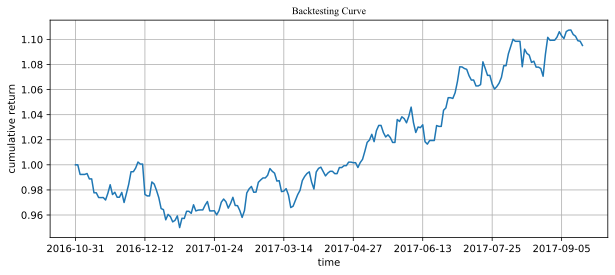

In [55]:
fontTNR = "Times New Roman"
plt.figure(figsize = (10, 4))
plt.plot(time, cum_rtn)
plt.xticks(test_set.index[::30])
plt.grid()

plt.title("Backtesting Curve", fontsize = 15, fontproperties = fontTNR)
plt.xlabel("time")
plt.ylabel("cumulative return")

plt.show()


# remarks

** NLP 和 基本面分析 

** 价量 LTCM倒闭 俄罗斯违约

**************
shortcoming:
-> data window
-> RNN:




other considerations

-> fisjew